In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("kyphosis")

In [4]:
print("DataFrame Head: ")
df.head()

DataFrame Head: 


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()


In [10]:
scaler.fit(df.drop('Kyphosis',axis=1))

D:\chandana\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features=scaler.transform(df.drop('Kyphosis',axis=1))


D:\chandana\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [12]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Kyphosis,Age,Number
0,-0.219143,-0.652035,-1.337907
1,1.287494,-0.652035,0.516341
2,0.767964,-0.030684,-1.337907
3,-1.414063,0.590667,-2.162017
4,-1.431381,-0.030684,0.722368


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['Kyphosis'],test_size=0.30,random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
pred=knn.predict(x_test)


In [19]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

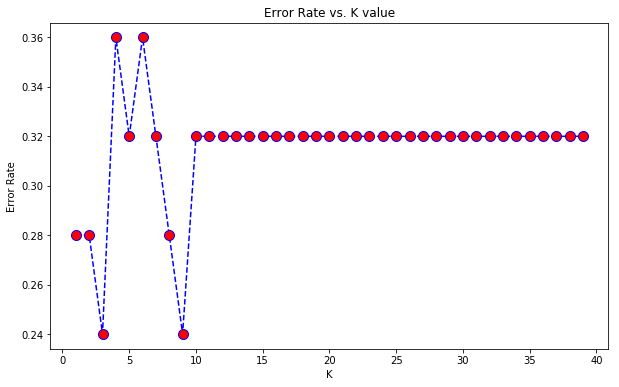

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test =train_test_split(scaled_features,df['Kyphosis'], test_size=0.30,random_state=101)

In [23]:
from sklearn.svm import SVC

In [24]:
model=SVC()

In [25]:
model.fit(x_train,y_train)

D:\chandana\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
prediction=model.predict(x_test)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,prediction))

[[17  0]
 [ 8  0]]


In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.68      1.00      0.81        17
     present       0.00      0.00      0.00         8

   micro avg       0.68      0.68      0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [33]:
grid.fit(x_train,y_train)

D:\chandana\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
D:\chandana\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
pred=model.predict(x_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.68      1.00      0.81        17
     present       0.00      0.00      0.00         8

   micro avg       0.68      0.68      0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\chandana\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
print(confusion_matrix(y_test,pred))
#cal accurcy etc

[[17  0]
 [ 8  0]]


In [38]:
(156+70)/(156+7+34+70)

0.846441947565543

In [39]:
param_grid={'C':[.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=False)

In [42]:
grid.fit(x_train,y_train)

D:\chandana\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\chandana\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [43]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
grid_prect=grid.predict(x_test)

In [46]:
print(confusion_matrix(y_test,grid_prect))

[[17  0]
 [ 8  0]]


In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

In [48]:
probs=knn.predict_proba(x_test)


In [49]:
probs=probs[:,1]

In [50]:
auc=roc_auc_score(y_test,probs)

In [51]:
auc

0.8676470588235294